In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
#taking the dataset stored as csv file as input and storing it in a pandas df

df = pd.read_csv("dataset.csv")
df.shape

(4920, 18)

In [4]:
#viewing first 5 entries of dataset to see how the data is

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#similarly last 5 rows

df.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#to view general info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
#to get a count of number of samples for ecah disease

df.groupby("Disease").size()

Disease
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hepat

In [8]:
#to find out how many unique diseases are present in the dataset

df.shape[0] / 120

41.0

In [9]:
#processing data

temp = pd.get_dummies(df.loc[:, df.columns != "Disease"], prefix = '', prefix_sep = '')
temp.head()

,acidity,back_pain,bladder_discomfort,breathlessness,burning_micturition,chest_pain,chills,constipation,continuous_sneezing,cough,...,congestion,phlegm,red_spots_over_body,blood_in_sputum,chest_pain,loss_of_smell,blood_in_sputum,loss_of_smell,muscle_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#to find all unique symptoms to apply one-hot-encoding

col_names = []
for x in temp:
  if x not in col_names:
    col_names.append(x)
print(col_names)
print(len(col_names))

[' acidity', ' back_pain', ' bladder_discomfort', ' breathlessness', ' burning_micturition', ' chest_pain', ' chills', ' constipation', ' continuous_sneezing', ' cough', ' cramps', ' fatigue', ' headache', ' high_fever', ' indigestion', ' joint_pain', ' mood_swings', ' muscle_wasting', ' muscle_weakness', ' neck_pain', ' pain_during_bowel_movements', ' patches_in_throat', ' pus_filled_pimples', ' shivering', ' skin_rash', ' stiff_neck', ' stomach_pain', ' sunken_eyes', ' vomiting', ' weakness_in_limbs', ' weight_gain', ' weight_loss', ' yellowish_skin', 'itching', ' abdominal_pain', ' anxiety', ' blackheads', ' blister', ' bruising', ' cold_hands_and_feets', ' dehydration', ' dizziness', ' foul_smell_of urine', ' knee_pain', ' lethargy', ' loss_of_appetite', ' nausea', ' nodal_skin_eruptions', ' pain_in_anal_region', ' restlessness', ' skin_peeling', ' sweating', ' swelling_joints', ' ulcers_on_tongue', ' weakness_of_one_body_side', ' altered_sensorium', ' bloody_stool', ' blurred_and_

In [11]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#applying one-hot-encoding

temp = temp.groupby(by=temp.columns, axis = 1).sum()
temp.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 131 entries,  abdominal_pain to itching
dtypes: uint8(131)
memory usage: 629.5 KB


In [14]:
#splitting dataset into features and labels

Y = df.Disease
disease_list = list(Y.unique())

In [15]:
disease_list

['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo']

In [16]:
#mapping diseases with numners (creating classes)

disease_dict = {}
for i in range(len(disease_list)):
  disease_dict[disease_list[i]] = i
disease_dict

{'Fungal infection': 0,
 'Allergy': 1,
 'GERD': 2,
 'Chronic cholestasis': 3,
 'Drug Reaction': 4,
 'Peptic ulcer diseae': 5,
 'AIDS': 6,
 'Diabetes ': 7,
 'Gastroenteritis': 8,
 'Bronchial Asthma': 9,
 'Hypertension ': 10,
 'Migraine': 11,
 'Cervical spondylosis': 12,
 'Paralysis (brain hemorrhage)': 13,
 'Jaundice': 14,
 'Malaria': 15,
 'Chicken pox': 16,
 'Dengue': 17,
 'Typhoid': 18,
 'hepatitis A': 19,
 'Hepatitis B': 20,
 'Hepatitis C': 21,
 'Hepatitis D': 22,
 'Hepatitis E': 23,
 'Alcoholic hepatitis': 24,
 'Tuberculosis': 25,
 'Common Cold': 26,
 'Pneumonia': 27,
 'Dimorphic hemmorhoids(piles)': 28,
 'Heart attack': 29,
 'Varicose veins': 30,
 'Hypothyroidism': 31,
 'Hyperthyroidism': 32,
 'Hypoglycemia': 33,
 'Osteoarthristis': 34,
 'Arthritis': 35,
 '(vertigo) Paroymsal  Positional Vertigo': 36,
 'Acne': 37,
 'Urinary tract infection': 38,
 'Psoriasis': 39,
 'Impetigo': 40}

In [17]:
disease_names = disease_dict.keys()
disease_labels = disease_dict.values()
print(disease_names)
print(disease_labels)

dict_keys(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo'])
dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])


In [18]:
type(Y)

pandas.core.series.Series

In [19]:
temp

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
symptom_list = list(temp.columns)

In [21]:
df1=pd.concat([Y,temp],axis=1)

In [22]:
df1

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Y = Y.map(disease_dict)
Y

0        0
1        0
2        0
3        0
4        0
        ..
4915    36
4916    37
4917    38
4918    39
4919    40
Name: Disease, Length: 4920, dtype: int64

In [24]:
temp.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
X = temp

In [26]:
#splitting data into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [27]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("Y_train : ",Y_train.shape)
print("Y_test : ",Y_test.shape)

#size of test and train data

X_train :  (3936, 131)
X_test :  (984, 131)
Y_train :  (3936,)
Y_test :  (984,)


In [28]:
#defining the random forest classifier

classifier = RandomForestClassifier()
classifier.fit(X,Y)

RandomForestClassifier()

In [29]:
#logistic regression

# classifier = LogisticRegressionCV(max_iter = 10)
# classifier.fit(X_train,Y_train)

In [30]:
Y_pred = classifier.predict(X_test)
Y_pred

array([37, 37, 32,  6,  3, 10, 33, 35, 20, 11, 38,  7, 22, 39, 24, 24, 28,
       23,  7, 12,  9, 19, 20,  9,  1, 21, 27, 11, 31, 11,  3, 20,  8, 23,
       30, 11, 14,  4, 27, 38, 21, 36, 10,  7, 14,  8, 33, 20, 39, 39, 29,
       25, 30,  1, 32, 21, 18, 26, 38,  5, 33, 32, 25, 29, 36, 31, 13,  6,
       36, 28,  0,  9, 37, 23, 31,  3, 40, 40, 26, 11,  2, 40,  2,  4, 20,
        6, 14,  8, 36, 17, 31, 15, 22, 24, 25,  8, 15, 29, 27, 17, 10,  9,
       24,  1,  5, 30,  2, 11, 23,  6, 22, 30, 29, 33,  7,  4, 31, 14, 33,
       24, 12, 39, 13, 16, 35, 27,  8, 32, 39, 34, 17, 12, 12, 12,  3, 37,
       20, 27, 28, 18,  5, 29, 39, 20, 22, 34,  4, 30, 25, 24,  7, 34,  5,
       18, 10, 18, 33, 22, 24,  1,  9, 14,  6, 29, 19, 18, 15,  9, 40, 32,
       19, 22, 19,  8, 27, 40,  6, 19, 26, 16, 15,  6,  1, 19, 11, 18,  7,
       20, 17, 38, 18, 37, 30, 27, 23, 16,  0, 12, 20, 34,  8, 19, 30, 17,
        0, 36,  2,  1,  3, 16, 20, 34, 29, 28,  8, 14, 15, 29,  3, 22, 17,
       24, 24, 10, 13, 19

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score


In [32]:
#confusion matrix

cm = confusion_matrix(Y_test,Y_pred)
cm

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 24,  0, ...,  0,  0,  0],
       [ 0,  0, 28, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 24]])

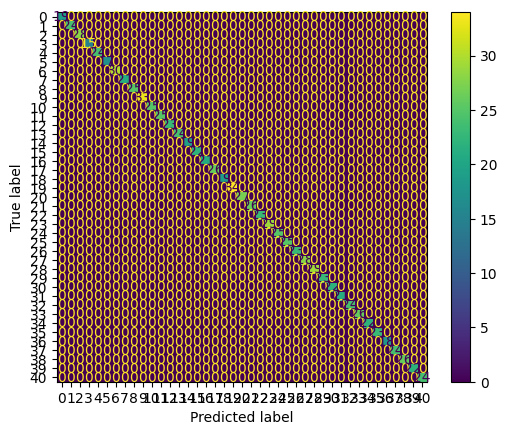

In [33]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show() 

In [34]:
#accuracy of the model

accuracy_score(Y_test,Y_pred) * 100

100.0

In [35]:
#displaying classification report of the model

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        21
          17       1.00    

[120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]


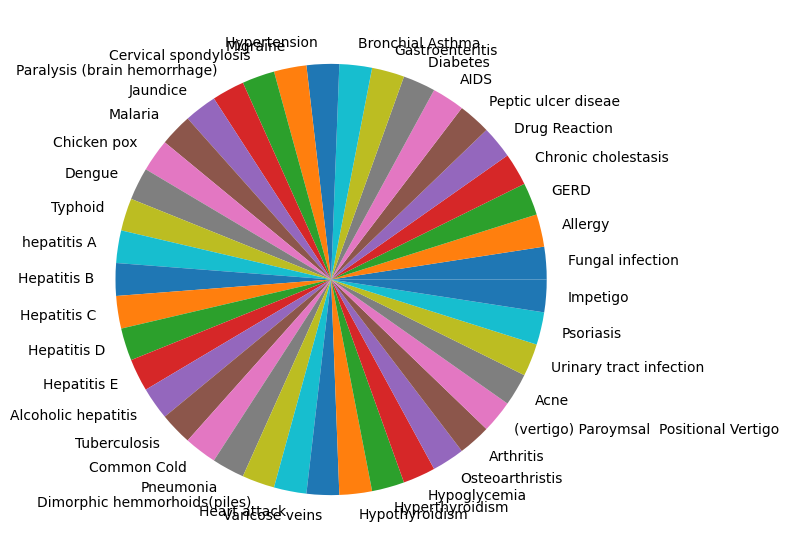

In [36]:
disease_list
 
data = list(df['Disease'].value_counts())
print(data)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = disease_list)
 
# show plot
plt.show()

[1032, 240, 222, 114, 114, 114, 228, 114, 108, 114, 114, 120, 114, 342, 450, 120, 114, 216, 696, 798, 114, 120, 120, 228, 114, 222, 564, 114, 570, 108, 234, 564, 108, 114, 336, 114, 120, 462, 108, 228, 234, 1932, 114, 102, 1134, 1362, 114, 114, 120, 222, 114, 114, 114, 474, 114, 684, 114, 114, 456, 1152, 342, 120, 702, 354, 228, 114, 114, 474, 108, 234, 1146, 228, 108, 228, 120, 114, 114, 228, 120, 114, 108, 354, 120, 114, 114, 108, 120, 120, 114, 234, 120, 228, 120, 120, 108, 108, 114, 120, 114, 786, 120, 114, 108, 108, 228, 120, 222, 108, 678, 348, 228, 114, 108, 120, 114, 120, 114, 108, 114, 114, 1914, 108, 108, 108, 114, 456, 114, 114, 816, 912, 678]


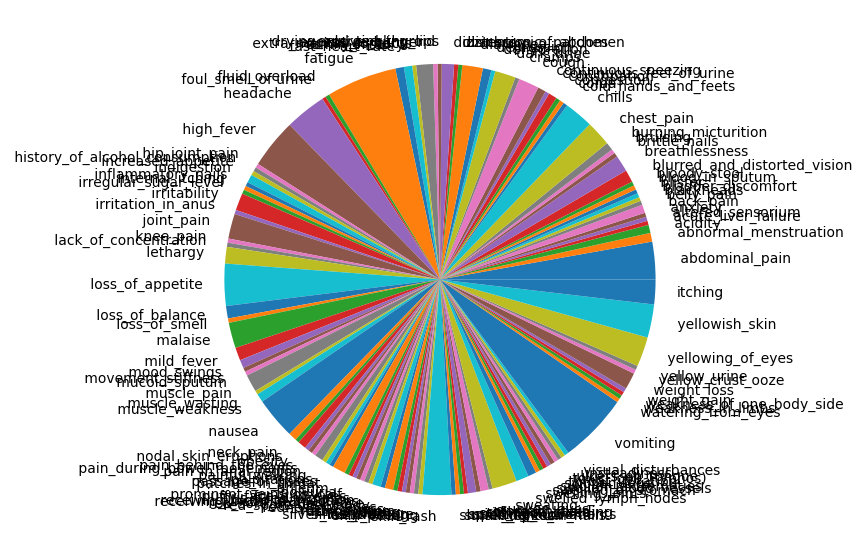

In [37]:


data = list(int(temp[i].sum()) for i in symptom_list)
print(data)
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = symptom_list)
# show plot
plt.show()

In [38]:
X_test_input = X_test[2:13]


In [39]:
X_test_input

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
1550,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2575,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3751,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
4193,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2662,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
# to convert a list to the df to predict the disease

def input_to_df(l):
    x_df = {}
    for i in symptom_list:
        x_df[i] = 0
    for i in l:
        if i in symptom_list:
            x_df[i] = 1
            
    return pd.DataFrame.from_dict([x_df])

In [41]:
symptom_list

[' abdominal_pain',
 ' abnormal_menstruation',
 ' acidity',
 ' acute_liver_failure',
 ' altered_sensorium',
 ' anxiety',
 ' back_pain',
 ' belly_pain',
 ' blackheads',
 ' bladder_discomfort',
 ' blister',
 ' blood_in_sputum',
 ' bloody_stool',
 ' blurred_and_distorted_vision',
 ' breathlessness',
 ' brittle_nails',
 ' bruising',
 ' burning_micturition',
 ' chest_pain',
 ' chills',
 ' cold_hands_and_feets',
 ' coma',
 ' congestion',
 ' constipation',
 ' continuous_feel_of_urine',
 ' continuous_sneezing',
 ' cough',
 ' cramps',
 ' dark_urine',
 ' dehydration',
 ' depression',
 ' diarrhoea',
 ' dischromic _patches',
 ' distention_of_abdomen',
 ' dizziness',
 ' drying_and_tingling_lips',
 ' enlarged_thyroid',
 ' excessive_hunger',
 ' extra_marital_contacts',
 ' family_history',
 ' fast_heart_rate',
 ' fatigue',
 ' fluid_overload',
 ' foul_smell_of urine',
 ' headache',
 ' high_fever',
 ' hip_joint_pain',
 ' history_of_alcohol_consumption',
 ' increased_appetite',
 ' indigestion',
 ' inflam

In [42]:
disease_dict = dict(zip(disease_labels,disease_names))
disease_dict

{0: 'Fungal infection',
 1: 'Allergy',
 2: 'GERD',
 3: 'Chronic cholestasis',
 4: 'Drug Reaction',
 5: 'Peptic ulcer diseae',
 6: 'AIDS',
 7: 'Diabetes ',
 8: 'Gastroenteritis',
 9: 'Bronchial Asthma',
 10: 'Hypertension ',
 11: 'Migraine',
 12: 'Cervical spondylosis',
 13: 'Paralysis (brain hemorrhage)',
 14: 'Jaundice',
 15: 'Malaria',
 16: 'Chicken pox',
 17: 'Dengue',
 18: 'Typhoid',
 19: 'hepatitis A',
 20: 'Hepatitis B',
 21: 'Hepatitis C',
 22: 'Hepatitis D',
 23: 'Hepatitis E',
 24: 'Alcoholic hepatitis',
 25: 'Tuberculosis',
 26: 'Common Cold',
 27: 'Pneumonia',
 28: 'Dimorphic hemmorhoids(piles)',
 29: 'Heart attack',
 30: 'Varicose veins',
 31: 'Hypothyroidism',
 32: 'Hyperthyroidism',
 33: 'Hypoglycemia',
 34: 'Osteoarthristis',
 35: 'Arthritis',
 36: '(vertigo) Paroymsal  Positional Vertigo',
 37: 'Acne',
 38: 'Urinary tract infection',
 39: 'Psoriasis',
 40: 'Impetigo'}

In [43]:
y_test_input = classifier.predict(X_test_input)
y_test_input

array([32,  6,  3, 10, 33, 35, 20, 11, 38,  7, 22])

In [44]:
import random
s_list = random.sample(symptom_list,6)
s_list
# x_df = {}
# for i in symptom_list:
#     x_df[i] = 0
# for i in s_list:
#     if i in symptom_list:
#         x_df[i] = 1
# x_df
# #pd.DataFrame.from_dict(x_df)

[' dark_urine',
 ' spinning_movements',
 ' throat_irritation',
 ' belly_pain',
 ' sweating',
 ' cramps']

In [45]:
y_test_input_labels = [disease_dict[i] for i in y_test_input]
y_test_input_labels

['Hyperthyroidism',
 'AIDS',
 'Chronic cholestasis',
 'Hypertension ',
 'Hypoglycemia',
 'Arthritis',
 'Hepatitis B',
 'Migraine',
 'Urinary tract infection',
 'Diabetes ',
 'Hepatitis D']

In [46]:
X_test_input = input_to_df(s_list)
X_test_input

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
import pickle as pkl

In [48]:
pkl.dump(classifier,open('model_disease_pred.pkl','wb'))

In [49]:
df[df.Disease == "Acne"]

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
370,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,Acne,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,Acne,skin_rash,pus_filled_pimples,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4793,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4834,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4875,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
